### Conjunto de dados

In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format

try:
    data = pd.read_csv("abev3-google.csv")
    data.round(4)
    print "{} exemplos \n {} características".format(*data.shape)
except:
    print "Não foi possível carregar o arquivo."

888 exemplos 
 6 características


### Estatísticas

In [3]:
display(data.describe())

,Open,High,Low,Close,Volume
count,888.00,888.00,888.00,888.00,888.00
mean,17.82,18.01,17.63,17.83,"12,126,211.94"
std,1.29,1.28,1.30,1.29,"5,713,186.23"
min,15.02,15.48,14.95,15.20,"2,539,800.00"
25%,16.64,16.80,16.46,16.64,"8,672,325.00"
50%,18.00,18.18,17.81,18.00,"10,896,300.00"
75%,18.99,19.17,18.78,18.98,"14,009,450.00"
max,20.40,20.46,20.19,20.35,"47,040,600.00"


### Gráficos

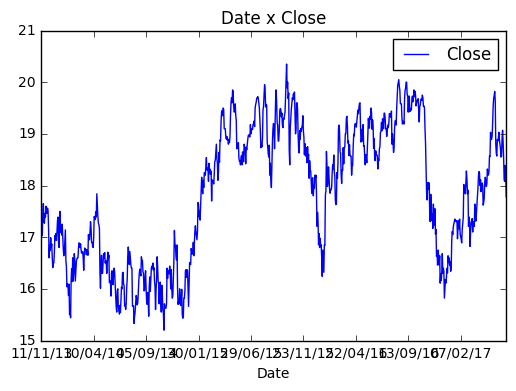

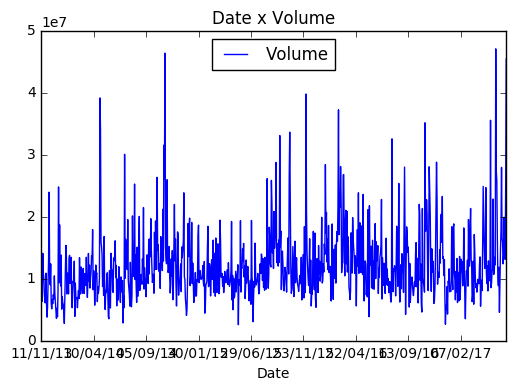

In [4]:
data.plot(x='Date', y='Close', title='Date x Close')
data.plot(x='Date', y='Volume', title='Date x Volume')

### Algoritmo

In [22]:
from sklearn.linear_model import LinearRegression

def time_series_split(data, split_size, iteration):
    data_size = len(data)
    training_size = (iteration+1) * data_size / (split_size + 1) + data_size % (split_size + 1)
    test_size = data_size / (split_size + 1)
    train, test = data[0:training_size], data[training_size:(training_size + test_size)]
    
    return train, test
        
clf = LinearRegression()

split_size = 4
for i in range(split_size):
    train, test = time_series_split(data, split_size, i)
    x_train = train[['Open']]
    y_train = train['Close']
    x_test = test[['Open']]
    y_test = test['Close']
    clf.fit(x_train, y_train)
    print clf.score(x_test, y_test)

# X_all = data[['Date', 'Open', 'Volume']]
# y_all = data['Close']
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

0.957133494375
0.871319795114
0.897253969923
0.958601031037
